# Лабораторная работа №2
## Выполнила студентка группы ДПИ22-2, Сирина Яна

### Задания для самостоятельной работы

Проделаем шаги, описанные в методических указаниях к лабораторной работе:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [2]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors


hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


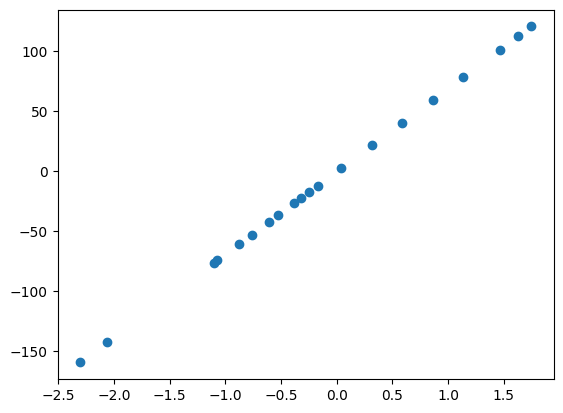

In [3]:
plt.figure()
plt.scatter(x, y)
plt.show()

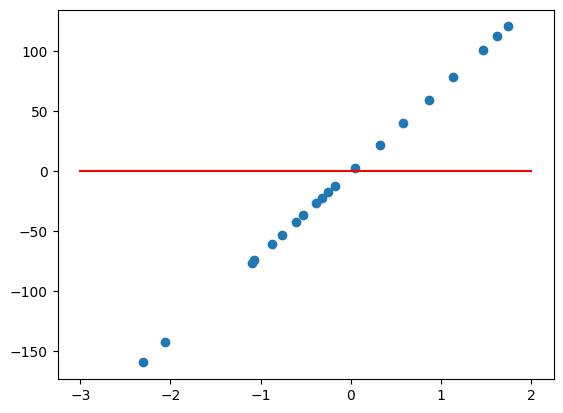

In [4]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [5]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060560065e-06


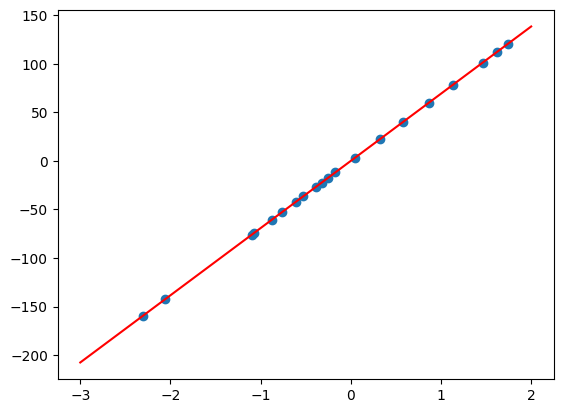

In [6]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

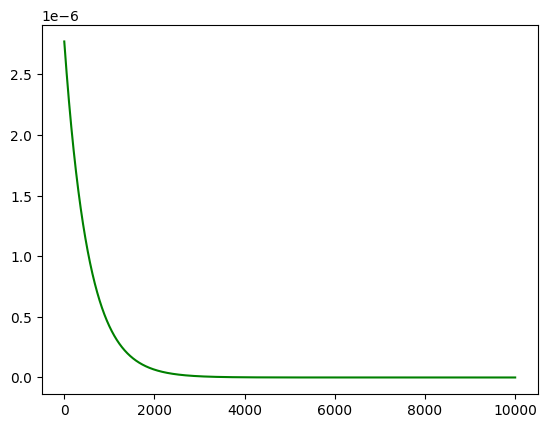

In [7]:
steps, errors = hyp.fit(x, y)
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

Воспользуемся методом hyp.fit(), который обучает модель на данных x и y со скоростью обучения alpha, точностью accuracy и максимальным количеством итераций градиентного спуска max_steps. С помощью метода hyp.error() найдем ошибку модели hyp на текущих данных x и y после завершения обучения и сохраним ее в переменную J1.
Построим и выведем график изменения ошибки на каждом шаге градиентного спуска, сделаем линию графика красной (во втором примере - синей):

error after gradient descent: 1.3815164761762406e-22


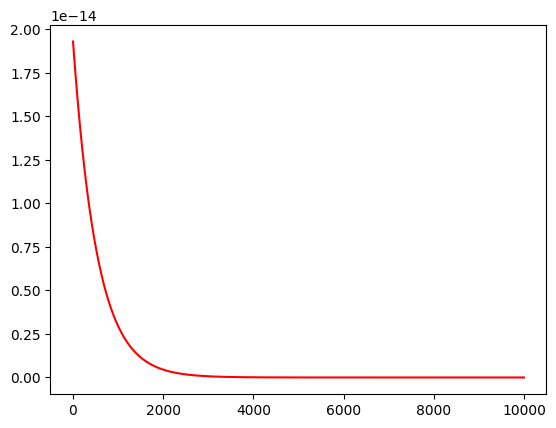

In [8]:
steps1, errors1 = hyp.fit(x, y, alpha=0.001, accuracy=100, max_steps=500)
J1 = hyp.error(x, y)
print("error after gradient descent:", J1)

plt.plot(steps1, errors1, 'r')
plt.show()

error after gradient descent: 3.3662499759253235e-23


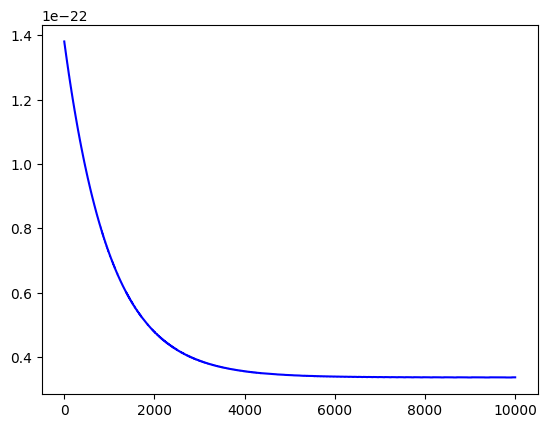

In [9]:
steps2, errors2 = hyp.fit(x, y, alpha=0.0005, accuracy=0.0001, max_steps=1000)
J2 = hyp.error(x, y)
print("error after gradient descent:", J2)

plt.plot(steps2, errors2, 'b')
plt.show()

 На графиках изображено гиперболическое уменьшение ошибки в зависимости от количества шагов градиентного спуска. Это указывает на то, что модель улучшает свои предсказания на каждом шаге и стремится к оптимуму.

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

Создадим объект класса Model. С помощью np.linspace() зададим список из 11 значений, равномерно распределённых между 1 и 11. Создадим пустой список errors_after_gradient, в который будем сохранять значения ошибок для каждой модели после обучения.
В цикле for будем итерироваться по списку alphas. Для каждого значения alpha будем обновлять значения b0 и b1 модели, вызывать функцию hyp.fit() и hyp.error(), результат которой запишем в errors_after_gradient. Выведем ошибку для каждого alpha:

In [10]:
hyp = Model()
alphas = list(np.linspace(1, 2, 11))
errors_after_gradient = []

for alpha in alphas:
    hyp.b0, hyp.b1 = 0, 0
    hyp.fit(x, y, alpha=alpha, max_steps=500)
    J = hyp.error(x, y)
    errors_after_gradient.append(J)
    print(f"error after gradient descent (alpha = {alpha}):", J)

error after gradient descent (alpha = 1.0): 2.4947726127614498e-29
error after gradient descent (alpha = 1.1): 2.4932934985641607e-29
error after gradient descent (alpha = 1.2): 2.4972378030902655e-29
error after gradient descent (alpha = 1.3): 2.4375801971329266e-29
error after gradient descent (alpha = 1.4): 2.4972378030902655e-29
error after gradient descent (alpha = 1.5): 2.4947726127614498e-29
error after gradient descent (alpha = 1.6): inf


/var/folders/45/wc4kvkqd2074zx6flfbn3v_c0000gn/T/ipykernel_80358/3685444709.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  self.b1 -= alpha * dJ1


error after gradient descent (alpha = 1.7000000000000002): nan
error after gradient descent (alpha = 1.8): nan
error after gradient descent (alpha = 1.9): nan
error after gradient descent (alpha = 2.0): nan


При значении alpha >= 1.6 ошибка резко возрастает и модель расходится.

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спуска таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

Модифицируем имеющийся класс Model. В методе-конструкторе init будем создавать объекты класса Model с атрибутами b0 и b1, равными 0.
В методе predict() будем находить и возвращать предсказанные значения, используя текущие параметры b0 и b1.
В методе error() вычисляем среднеквадратичную ошибку между предсказанными значениями и реальными значениями Y, возвращая значение ошибки.

Модифицируем метод fit(). Алгоритм градиентного спуска в fit обновляет параметры b0 и b1 на каждом шаге, вычисляя производные ошибки по b0 и b1 (dJ0 и dJ1), и корректируя коэффициенты. Процесс продолжается до тех пор, пока ошибка значительно снижается или пока не будет достигнуто максимальное количество шагов.

Проверим модифицированные методы с помощью Series и DataFrame.

In [13]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    """Модифицированный алгоритм градиентного спуска"""
    def fit(self, X, Y, alpha=0.001, min_delta=1e-6, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_err = float('inf')

        while step < max_steps:
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if prev_err - new_err < min_delta:
                break

            prev_err = new_err

        return steps, errors

# Пример использования с Series
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([2, 4, 5, 4, 5])

hyp = Model()
J = hyp.error(x, y)
print("initial error:", J)

steps, errors = hyp.fit(x, y, alpha=0.001, min_delta=1e-6, max_steps=999)
J1 = hyp.error(x, y)
print("error after gradient descent:", J1)

# Пример использования с DataFrame
data = pd.DataFrame({'X': [1, 2, 9, 4, 5], 'Y': [12, 4, 35, 4, 5]})
x = data['X']
y = data['Y']

hyp = Model()
J = hyp.error(x, y)
print("initial error:", J)

steps, errors = hyp.fit(x, y, alpha=0.001, min_delta=1e-6, max_steps=999)
J1 = hyp.error(x, y)
print("error after gradient descent:", J1)

initial error: 8.6
error after gradient descent: 0.4716323401225113
initial error: 142.6
error after gradient descent: 31.276985331281253


In [14]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

Final b0: 0.0001067010784189204
Final b1: 69.18748023941718


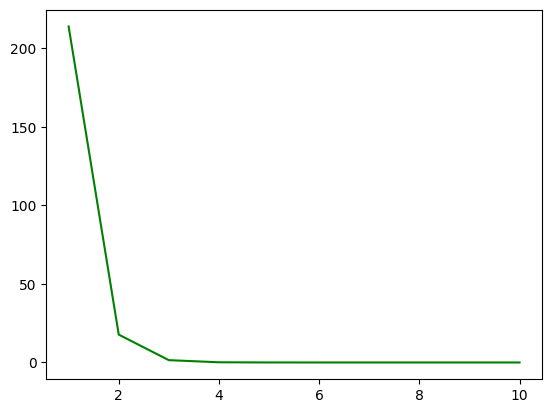

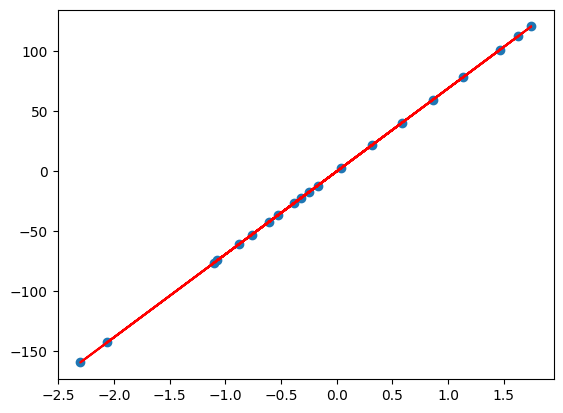

In [15]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.learning_rate = 1.0  # Инициализируем скорость обучения

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, min_delta=1e-6, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_err = float('inf')
        learning_rate_attempts = 0
        max_learning_rate_attempts = 5  # Максимальное количество попыток уменьшения скорости обучения

        while step < max_steps:
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= self.learning_rate * dJ0
            self.b1 -= self.learning_rate * dJ1

            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if prev_err - new_err < min_delta:
                break

            if new_err > prev_err:
                # Если ошибка увеличивается, уменьшаем скорость обучения в 2 раза и увеличиваем счетчик попыток
                self.learning_rate /= 2
                learning_rate_attempts += 1

                if learning_rate_attempts >= max_learning_rate_attempts:
                    break  # Прекращаем обучение, если достигнуто максимальное количество попыток

                continue  # Повторяем текущую итерацию

            # Если ошибка уменьшается или не изменяется, сбрасываем счетчик попыток
            learning_rate_attempts = 0
            prev_err = new_err

        return steps, errors
hyp = Model()
steps, errors = hyp.fit(x,y)
print("Final b0:", hyp.b0)
print("Final b1:", hyp.b1)

plt.plot(steps, errors, 'g')
plt.show()

plt.scatter(x, y, label='Исходные данные')
plt.plot(x, hyp.predict(x), color='red', label='Предсказанные значения')
plt.show()

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Создадим метод plot_results(), который рисует два графика: график ошибки и график регрессии. 

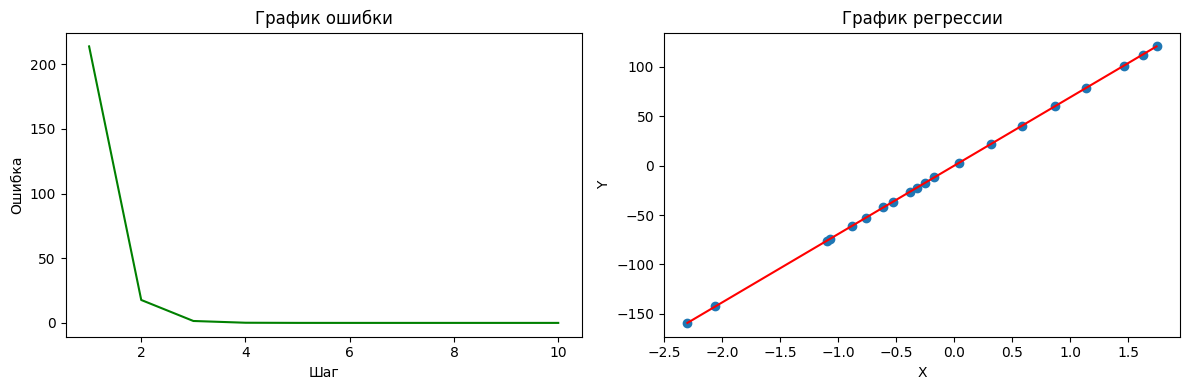

In [20]:
import numpy as np

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.learning_rate = 1.0  # Инициализируем скорость обучения

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, min_delta=1e-6, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_err = float('inf')
        learning_rate_attempts = 0
        max_learning_rate_attempts = 5  # Максимальное количество попыток уменьшения скорости обучения

        while step < max_steps:
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= self.learning_rate * dJ0
            self.b1 -= self.learning_rate * dJ1

            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if prev_err - new_err < min_delta:
                break

            if new_err > prev_err:
                # Если ошибка увеличивается, уменьшаем скорость обучения в 2 раза и увеличиваем счетчик попыток
                self.learning_rate /= 2
                learning_rate_attempts += 1

                if learning_rate_attempts >= max_learning_rate_attempts:
                    break  # Прекращаем обучение, если достигнуто максимальное количество попыток

                continue  # Повторяем текущую итерацию

            # Если ошибка уменьшается или не изменяется, сбрасываем счетчик попыток
            learning_rate_attempts = 0
            prev_err = new_err

        self.plot_results(X, Y, steps, errors)  # Добавляем вызов метода для рисования графиков

    def plot_results(self, X, Y, steps, errors):
        plt.figure(figsize=(12, 4))

        # График ошибки
        plt.subplot(121)
        plt.plot(steps, errors, 'g', label='Ошибка')
        plt.xlabel('Шаг')
        plt.ylabel('Ошибка')
        plt.title('График ошибки')

        # График регрессии
        plt.subplot(122)
        plt.scatter(X, Y, label='Исходные данные')
        # Сортировка значений X и расчёт соответствующих предсказанных значений Y
        sorted_indices = np.argsort(X)
        X_sorted = X[sorted_indices]
        Y_pred_sorted = self.predict(X_sorted)
        plt.plot(X_sorted, Y_pred_sorted, color='red', label='Регрессионная линия')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('График регрессии')

        plt.tight_layout()
        plt.show()


hyp = Model()
hyp.fit(x, y)

### Контрольные вопросы

1. Сформулируйте, в чем состоит задача регрессии, придумайте несколько примеров.

Задача регрессии - прогноз на основе выборки объектов с различными признаками. На выходе должно получиться вещественное число (2, 35, 76.454 и др.), к примеру цена квартиры, стоимость ценной бумаги по прошествии полугода, ожидаемый доход магазина на следующий месяц, качество вина при слепом тестировании.

2. Что такое метод градиентного спуска?

Градиентный спуск — это оптимизационный алгоритм, который используется для нахождения минимального или максимального значения функции. Этот алгоритм часто применяется в машинном обучении и искусственном интеллекте для минимизации функции потерь, которая измеряет, насколько далеко предсказания модели от фактических результатов.

Принцип работы градиентного спуска заключается в следующем:

* Выбирается начальная точка (начальные значения параметров модели).
* Вычисляется градиент функции потерь в этой точке, то есть вектор частных производных, который показывает направление наискорейшего роста функции.
* Делается шаг в направлении, противоположном градиенту (в сторону наискорейшего убывания функции), что приводит к уменьшению значения функции.
* Размер шага определяется параметром, называемым скоростью обучения (learning rate).
* Процесс повторяется итеративно до тех пор, пока не будет достигнут критерий остановки, например, до достижения заданного числа итераций, до того, как изменение функции потерь станет незначительным или до того, как градиент приблизится к нулю.

3. Что такое скорость обучения в методе градиентного спуска?

Скорость обучения — это параметр в методе градиентного спуска, который определяет размер шага, который делает алгоритм в процессе оптимизации при каждом обновлении параметров модели. Он контролирует, как быстро или медленно алгоритм учится и приближается к минимуму функции ошибки.

4. Какие функции ошибки используются в регрессионных моделях и почему именно такие?

В регресионных моделях используются следующие функции ошибки:

* MSE (Среднеквадратическая ошибка): учитывает большие ошибки, улучшает модель, полезна для градиентного спуска.
* MAE (Средняя абсолютная ошибка): менее чувствительна к выбросам, минимизирует среднюю ошибку.
* RMSE (Корень из среднеквадратичной ошибки): имеет те же единицы измерения, что и предсказания, легко интерпретируется.
* MAPE (Средняя абсолютная процентная ошибка): оценка ошибки в процентах, полезна для анализа относительных ошибок.
* Хуберова ошибка: устойчива к выбросам, учитывает как маленькие, так и большие ошибки.

5. Что показывает конкретное значение ошибки регрессии?

Конкретное значение ошибки регрессии показывает, насколько сильно предсказания модели отличаются от реальных значений данных. Чем меньше значение ошибки, тем точнее модель предсказывает результаты.

6. Что показывает график обучения и зачем его строить?

График обучения показывает, как меняется ошибка модели (или другая метрика качества) на протяжении процесса обучения. Он отображает ошибку на каждом шаге (или эпохе) обучения. Это позволяет отслеживать прогресс и эффективность алгоритма.